<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [45]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [46]:
# Answer:
movies.info()
#This shows that there are 979 entries (rows), and 6 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Check the data type of each column.

In [5]:
# Answer:
#The data types for each column can also be seen using the movies.info() command

#### Calculate the average movie duration.

In [47]:
# Answer:
movies.duration.mean()
#The avearage movie duration is 121 minutes

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [48]:
# Answer:
movies.sort_values(by=['duration'])
#The shortest movies is Freaks, at a duration of 64 minutes, and Hamlet is the longest movie with a duration of 242 minutes

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

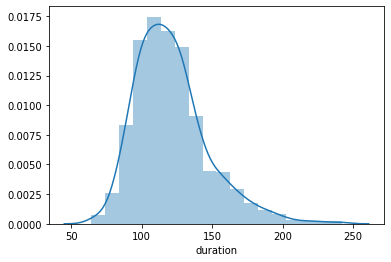

In [49]:
# Answer:
import seaborn as sns
sns.distplot(movies.duration,bins=18)
#Chosen 18 bins as that roughly divides the durations by 10 min intervals

#### Use a box plot to display that same data.

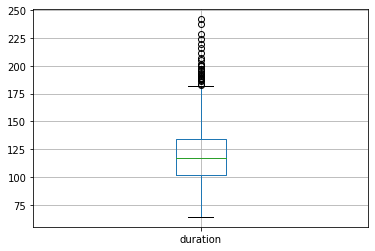

In [50]:
# Answer:
movies.boxplot(column=['duration'])

## Intermediate level

#### Count how many movies have each of the content ratings.

In [51]:
# Answer:
movies.groupby(['content_rating']).size()

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

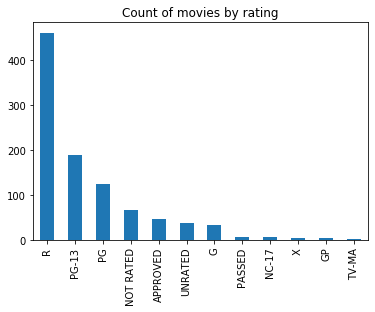

In [52]:
# Answer:
movies.content_rating.value_counts().plot(kind='bar',title='Count of movies by rating',x='Content rating',y='Number of Movies')


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

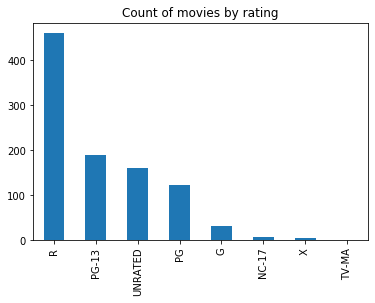

In [54]:
# Answer:
movies_new.content_rating = movies.content_rating.replace(['NOT RATED','APPROVED','PASSED','GP'],'UNRATED')

movies_new.content_rating.value_counts().plot(kind='bar',title='Count of movies by rating',x='Content rating',y='Number of Movies')


#### Convert the following content ratings to "NC-17": X, TV-MA.

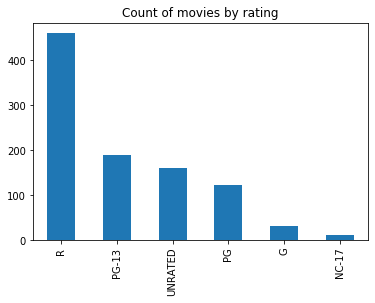

In [56]:
# Answer:
movies_new_2.content_rating = movies_new.content_rating.replace(['TV-MA','X'],'NC-17')
movies_new_2.content_rating.value_counts().plot(kind='bar',title='Count of movies by rating',x='Content rating',y='Number of Movies')


#### Count the number of missing values in each column.

In [57]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [58]:
# Answer:
movies.content_rating = movies.content_rating.fillna('UNRATED')
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [69]:
# Answer:
rating_over2hrs = movies[['star_rating']].loc[movies['duration']>=120].mean()
print('rating for movies 2 hours and over is :/n', rating_over2hrs)
rating_under2hrs = movies[['star_rating']].loc[movies['duration']<120].mean()
print('rating for movies under 2 hrs is :/n', rating_under2hrs)


rating for movies 2 hours and over is :/n star_rating    7.948899
dtype: float64
rating for movies under 2 hrs is :/n star_rating    7.838667
dtype: float64


#### Use a visualization to detect whether there is a relationship between duration and star rating.

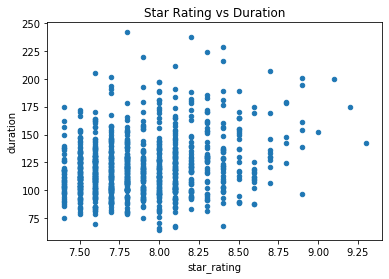

In [72]:
# Answer:
movies.plot(kind='scatter',x='star_rating',y='duration',title='Star Rating vs Duration')
#There doesn't seem to be any relationship between the two variables.

#### Calculate the average duration for each genre.

In [74]:
# Answer:
movies.groupby(['genre'])['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

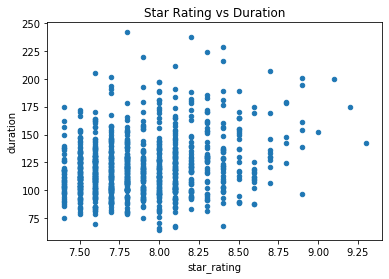

In [77]:
# Answer:
movies.plot(kind='scatter',x='star_rating',y='duration',title='Star Rating vs Duration')

#### Determine the top rated movie (by star rating) for each genre.

In [80]:
# Answer:
movies[['genre','star_rating','title']].loc[movies.groupby('genre')['star_rating'].idxmax()]

,genre,star_rating,title
3,Action,9.0,The Dark Knight
7,Adventure,8.9,The Lord of the Rings: The Return of the King
30,Animation,8.6,Spirited Away
8,Biography,8.9,Schindler's List
25,Comedy,8.6,Life Is Beautiful
0,Crime,9.3,The Shawshank Redemption
5,Drama,8.9,12 Angry Men
468,Family,7.9,E.T. the Extra-Terrestrial
638,Fantasy,7.7,The City of Lost Children
105,Film-Noir,8.3,The Third Man


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [85]:
# Answer:
movies[movies['title'].duplicated(keep=False)].sort_values(by='title')
#The movies are not repeats, they are older/newer versions, or versions in different languages

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [91]:
# Answer:
movies_2 = movies.groupby('genre').agg({'star_rating': 'mean','title': 'count'})
movies_2.loc[movies_2['title']>=10]

,star_rating,title
genre,,
Action,7.884559,136
Adventure,7.933333,75
Animation,7.914516,62
Biography,7.862338,77
Comedy,7.822436,156
Crime,7.916935,124
Drama,7.902518,278
Horror,7.806897,29
Mystery,7.975000,16


## Bonus

#### Figure out something "interesting" using the actors data!